In [101]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [103]:
survey = pd.read_excel('Frameology_Survey.xls', sheet_name='data_cleaned')
survey.head()

,Q1_gender,Q2_age,Q3_interest,Q4_purchase_frequency,Q5_barrier,Q6_previous_purchase,Q7_channel,Q8_motivation,Q9_purchase_factor,Q10_attribute_most,...,Q10_most_packaging,Q10_most_speed of delivery,Q10_least_quality of artwork,Q10_least_customization options,Q10_least_price,Q10_ least_artist's background,Q10_least_packaging,Q10_least_speed of delivery,Q11_artistic_background,Q12_AR
0,2,2,2,4,"2,3",2,3,"1,2","3,4,5",5,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0
1,2,2,4,3,"1,2","3,4",3,"1,5","2,3,4",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0
2,1,2,4,3,1,"1,4",2,"1,2,5","2,3,4",2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,4.0
3,1,2,2,2,2,2,3,"2,3",2,1,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,2.0
4,1,3,3,2,"1,2,3,4","1,2,3,4",6,"1,2,3","1,2,3",1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,5.0


In [105]:
# Replace NaN values with 0
survey = survey.fillna(0)

# Display the updated DataFrame to verify
survey.head()

,Q1_gender,Q2_age,Q3_interest,Q4_purchase_frequency,Q5_barrier,Q6_previous_purchase,Q7_channel,Q8_motivation,Q9_purchase_factor,Q10_attribute_most,...,Q10_most_packaging,Q10_most_speed of delivery,Q10_least_quality of artwork,Q10_least_customization options,Q10_least_price,Q10_ least_artist's background,Q10_least_packaging,Q10_least_speed of delivery,Q11_artistic_background,Q12_AR
0,2,2,2,4,"2,3",2,3,"1,2","3,4,5",5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
1,2,2,4,3,"1,2","3,4",3,"1,5","2,3,4",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0
2,1,2,4,3,1,"1,4",2,"1,2,5","2,3,4",2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
3,1,2,2,2,2,2,3,"2,3",2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0
4,1,3,3,2,"1,2,3,4","1,2,3,4",6,"1,2,3","1,2,3",1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,5.0


In [107]:
# Convert Q8: motivation into dummy variables
for value in ['1', '2', '3', '4', '5', '6', '7']:
    survey[f'Q8_motivation_{value}'] = survey['Q8_motivation'].apply(lambda x: 1 if str(value) in str(x).split(',') else 0)

# Convert Q9: purchase_factor into dummy variables
for value in ['1', '2', '3', '4', '5', '6']:
    survey[f'Q9_purchase_factor_{value}'] = survey['Q9_purchase_factor'].apply(lambda x: 1 if str(value) in str(x).split(',') else 0)

# Verify the updated DataFrame
survey.head()

,Q1_gender,Q2_age,Q3_interest,Q4_purchase_frequency,Q5_barrier,Q6_previous_purchase,Q7_channel,Q8_motivation,Q9_purchase_factor,Q10_attribute_most,...,Q8_motivation_4,Q8_motivation_5,Q8_motivation_6,Q8_motivation_7,Q9_purchase_factor_1,Q9_purchase_factor_2,Q9_purchase_factor_3,Q9_purchase_factor_4,Q9_purchase_factor_5,Q9_purchase_factor_6
0,2,2,2,4,"2,3",2,3,"1,2","3,4,5",5,...,0,0,0,0,0,0,1,1,1,0
1,2,2,4,3,"1,2","3,4",3,"1,5","2,3,4",1,...,0,1,0,0,0,1,1,1,0,0
2,1,2,4,3,1,"1,4",2,"1,2,5","2,3,4",2,...,0,1,0,0,0,1,1,1,0,0
3,1,2,2,2,2,2,3,"2,3",2,1,...,0,0,0,0,0,1,0,0,0,0
4,1,3,3,2,"1,2,3,4","1,2,3,4",6,"1,2,3","1,2,3",1,...,0,0,0,0,1,1,1,0,0,0


In [109]:
# Convert Q7: channel into dummy variables
for value in ['1', '2', '3', '4', '5', '6']:
    survey[f'Q7_channel_{value}'] = survey['Q7_channel'].apply(lambda x: 1 if str(value) in str(x).split(',') else 0)

# Convert Q5: barrier into dummy variables
for value in ['1', '2', '3', '4', '5']:
    survey[f'Q5_barrier_{value}'] = survey['Q5_barrier'].apply(lambda x: 1 if str(value) in str(x).split(',') else 0)

survey.head()

,Q1_gender,Q2_age,Q3_interest,Q4_purchase_frequency,Q5_barrier,Q6_previous_purchase,Q7_channel,Q8_motivation,Q9_purchase_factor,Q10_attribute_most,...,Q7_channel_2,Q7_channel_3,Q7_channel_4,Q7_channel_5,Q7_channel_6,Q5_barrier_1,Q5_barrier_2,Q5_barrier_3,Q5_barrier_4,Q5_barrier_5
0,2,2,2,4,"2,3",2,3,"1,2","3,4,5",5,...,0,1,0,0,0,0,1,1,0,0
1,2,2,4,3,"1,2","3,4",3,"1,5","2,3,4",1,...,0,1,0,0,0,1,1,0,0,0
2,1,2,4,3,1,"1,4",2,"1,2,5","2,3,4",2,...,1,0,0,0,0,1,0,0,0,0
3,1,2,2,2,2,2,3,"2,3",2,1,...,0,1,0,0,0,0,1,0,0,0
4,1,3,3,2,"1,2,3,4","1,2,3,4",6,"1,2,3","1,2,3",1,...,0,0,0,0,1,1,1,1,1,0


In [111]:
# Convert Q10: attribute importance into dummy variables
for value in ['1', '2', '3', '4', '5']:
    survey[f'Q10_attribute_most_{value}'] = survey['Q10_attribute_most'].apply(lambda x: 1 if str(value) in str(x).split(',') else 0)
for value in ['1', '2', '3', '4', '5']:
    survey[f'Q10_attribute_least_{value}'] = survey['Q10_attribute_least'].apply(lambda x: 1 if str(value) in str(x).split(',') else 0)
    
survey.head()

,Q1_gender,Q2_age,Q3_interest,Q4_purchase_frequency,Q5_barrier,Q6_previous_purchase,Q7_channel,Q8_motivation,Q9_purchase_factor,Q10_attribute_most,...,Q10_attribute_most_1,Q10_attribute_most_2,Q10_attribute_most_3,Q10_attribute_most_4,Q10_attribute_most_5,Q10_attribute_least_1,Q10_attribute_least_2,Q10_attribute_least_3,Q10_attribute_least_4,Q10_attribute_least_5
0,2,2,2,4,"2,3",2,3,"1,2","3,4,5",5,...,0,0,0,0,1,0,0,0,0,0
1,2,2,4,3,"1,2","3,4",3,"1,5","2,3,4",1,...,1,0,0,0,0,0,0,0,0,0
2,1,2,4,3,1,"1,4",2,"1,2,5","2,3,4",2,...,0,1,0,0,0,0,0,0,0,0
3,1,2,2,2,2,2,3,"2,3",2,1,...,1,0,0,0,0,0,0,1,0,0
4,1,3,3,2,"1,2,3,4","1,2,3,4",6,"1,2,3","1,2,3",1,...,1,0,0,0,0,0,0,0,0,1


In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

dummy_columns = [col for col in survey.columns if col.startswith(('Q5_barrier_', 'Q7_channel_', 'Q8_motivation_', 'Q10_attribute_most_'))]
numerical_columns = ['Q3_interest', 'Q4_purchase_frequency']
clustering_data = survey[dummy_columns + numerical_columns]
clustering_data.head()

,Q8_motivation_1,Q8_motivation_2,Q8_motivation_3,Q8_motivation_4,Q8_motivation_5,Q8_motivation_6,Q8_motivation_7,Q7_channel_1,Q7_channel_2,Q7_channel_3,...,Q5_barrier_3,Q5_barrier_4,Q5_barrier_5,Q10_attribute_most_1,Q10_attribute_most_2,Q10_attribute_most_3,Q10_attribute_most_4,Q10_attribute_most_5,Q3_interest,Q4_purchase_frequency
0,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,2,4
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,4,3
2,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,4,3
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2,2
4,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,3,2


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

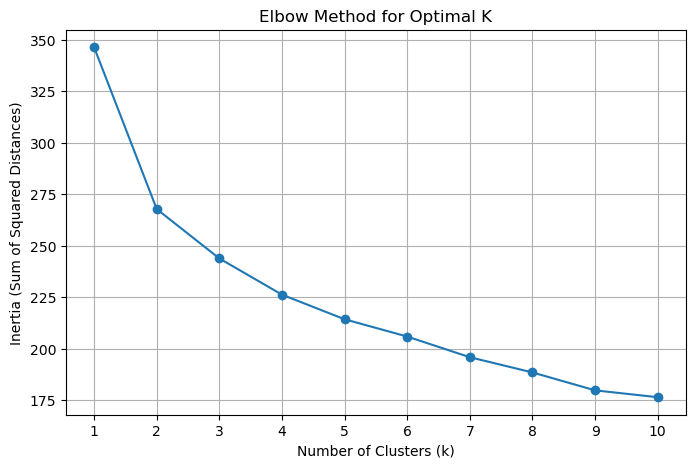

In [115]:
import matplotlib.pyplot as plt

# Step 6: Elbow Method to determine the optimal number of clusters
inertia = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

Explained Variance and Cumulative Variance by PCA Components:
Principal Component 1: 32.68% variance explained (Cumulative: 32.68%)
Principal Component 2: 10.02% variance explained (Cumulative: 42.70%)
Principal Component 3: 8.83% variance explained (Cumulative: 51.53%)
Principal Component 4: 7.26% variance explained (Cumulative: 58.79%)
Principal Component 5: 5.83% variance explained (Cumulative: 64.62%)


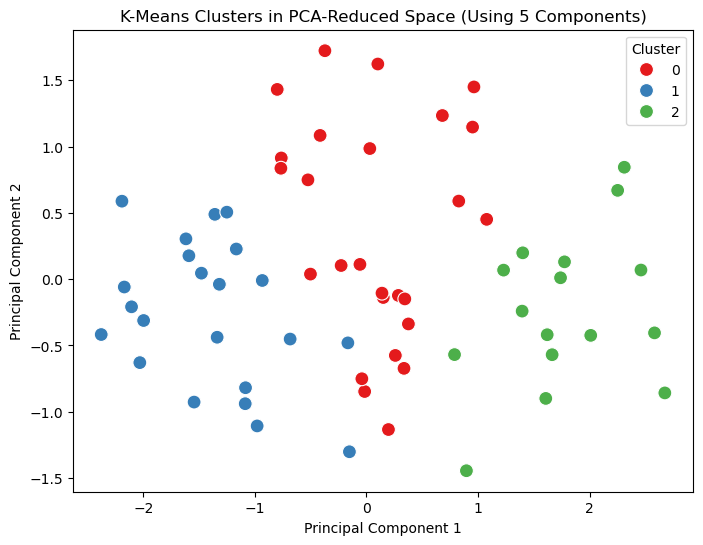

In [117]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Recompute PCA with 3 components
pca = PCA(n_components=5)
pca_data = pca.fit_transform(clustering_data[dummy_columns + numerical_columns])

# Perform K-Means clustering with 4 clusters on the PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_clusters = kmeans_pca.fit_predict(pca_data)

# Adding PCA and cluster labels back into a DataFrame for further analysis
pca_results = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(5)])
pca_results["Cluster"] = pca_clusters

# Display explained variance by PCA components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance and Cumulative Variance by PCA Components:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"Principal Component {i}: {var:.2%} variance explained (Cumulative: {cum_var:.2%})")

# Visualizing the first two components in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_results, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=100)
plt.title("K-Means Clusters in PCA-Reduced Space (Using 5 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [173]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for the clustering
silhouette_avg = silhouette_score(pca_data, pca_clusters)

# Display the silhouette score
print(f"Silhouette Score for the current clustering: {silhouette_avg:.4f}")

Silhouette Score for the current clustering: 0.2032


In [119]:
# Extract factor loadings (PCA components' contributions to the original features)
factor_loadings = pd.DataFrame(
    pca.components_.T,
    index=dummy_columns + numerical_columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Display factor loadings
factor_loadings

,PC1,PC2,PC3,PC4,PC5
Q8_motivation_1,-0.022591,-0.256126,0.317677,0.058082,-0.150686
Q8_motivation_2,-0.116738,0.339271,-0.046622,0.254044,-0.151763
Q8_motivation_3,0.030916,-0.322803,-0.077967,-0.283393,0.023895
Q8_motivation_4,-0.071489,-0.041673,0.118463,-0.016847,0.142711
Q8_motivation_5,-0.109383,-0.140614,0.149617,0.181648,0.114982
Q8_motivation_6,-0.031794,-0.129599,0.029638,0.060888,0.172156
Q8_motivation_7,0.003037,-0.004290,-0.019651,-0.022666,0.003496
Q7_channel_1,-0.000536,-0.422277,0.023768,0.098662,0.137547
Q7_channel_2,0.024379,0.360798,-0.107319,0.192857,0.158772
Q7_channel_3,0.011982,0.058117,0.195377,-0.080646,-0.345960


In [121]:
# Add cluster labels from k-means clustering to the original data
clustering_data['Cluster'] = pca_clusters

# Compute the mean of each variable across clusters
cluster_means = clustering_data.groupby('Cluster').mean()

# Display the computed means for each cluster
cluster_means

/var/folders/5s/b54n5cr10c5dn7z42mb8yvc80000gn/T/ipykernel_22248/1885023844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = pca_clusters


,Q8_motivation_1,Q8_motivation_2,Q8_motivation_3,Q8_motivation_4,Q8_motivation_5,Q8_motivation_6,Q8_motivation_7,Q7_channel_1,Q7_channel_2,Q7_channel_3,...,Q5_barrier_3,Q5_barrier_4,Q5_barrier_5,Q10_attribute_most_1,Q10_attribute_most_2,Q10_attribute_most_3,Q10_attribute_most_4,Q10_attribute_most_5,Q3_interest,Q4_purchase_frequency
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.500000,0.730769,0.500000,0.153846,0.038462,0.076923,0.038462,0.307692,0.346154,0.153846,...,0.230769,0.576923,0.0000,0.692308,0.192308,0.038462,0.038462,0.038462,3.038462,2.115385
1,0.818182,0.681818,0.545455,0.272727,0.500000,0.136364,0.000000,0.545455,0.136364,0.136364,...,0.590909,0.500000,0.0000,0.636364,0.227273,0.045455,0.090909,0.000000,4.318182,2.727273
2,0.750000,0.187500,0.625000,0.062500,0.062500,0.062500,0.000000,0.437500,0.250000,0.187500,...,0.437500,0.750000,0.0625,0.437500,0.125000,0.250000,0.125000,0.062500,1.687500,1.250000


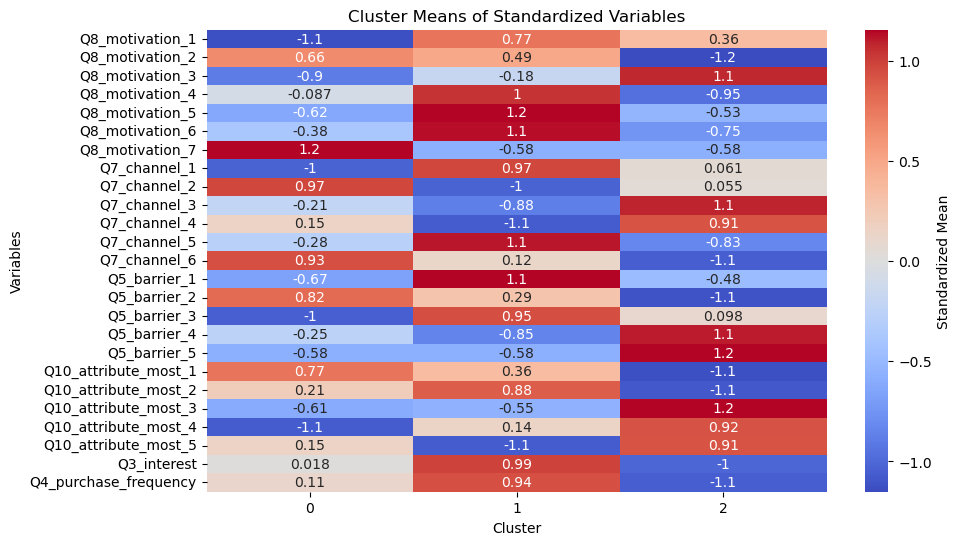

In [123]:
# Standardize the cluster means for visualization
cluster_means_standardized = (cluster_means - cluster_means.mean()) / cluster_means.std()

# Create a heatmap to visualize cluster means
plt.figure(figsize=(10, 6))
sns.heatmap(
    cluster_means_standardized.T,
    annot=True,
    cmap="coolwarm",
    cbar_kws={"label": "Standardized Mean"}
)
plt.title("Cluster Means of Standardized Variables")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

In [125]:
cluster_means_standardized

,Q8_motivation_1,Q8_motivation_2,Q8_motivation_3,Q8_motivation_4,Q8_motivation_5,Q8_motivation_6,Q8_motivation_7,Q7_channel_1,Q7_channel_2,Q7_channel_3,...,Q5_barrier_3,Q5_barrier_4,Q5_barrier_5,Q10_attribute_most_1,Q10_attribute_most_2,Q10_attribute_most_3,Q10_attribute_most_4,Q10_attribute_most_5,Q3_interest,Q4_purchase_frequency
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-1.130539,0.656875,-0.898027,-0.087069,-0.622994,-0.383276,1.154701,-1.029189,0.971099,-0.207398,...,-1.045540,-0.250313,-0.577350,0.773490,0.207398,-0.606204,-1.062767,0.152499,0.018052,0.113841
1,0.768767,0.493989,-0.179605,1.040688,1.153464,1.134943,-0.577350,0.968001,-1.026590,-0.880039,...,0.947193,-0.851064,-0.577350,0.355740,0.880039,-0.548008,0.140365,-1.067490,0.990852,0.938208
2,0.361773,-1.150865,1.077632,-0.953618,-0.530470,-0.751667,-0.577350,0.061188,0.055491,1.087436,...,0.098347,1.101378,1.154701,-1.129231,-1.087436,1.154212,0.922401,0.914991,-1.008904,-1.052049


In [127]:
# Define the mapping of old variable names to new descriptive names
variable_name_mapping = {
    'Q8_motivation_1': 'Motivation_Home Decor',
    'Q8_motivation_2': 'Motivation_Personal Expression',
    'Q8_motivation_3': 'Motivation_Gifts',
    'Q8_motivation_4': 'Motivation_Commemoration of Events',
    'Q8_motivation_5': 'Motivation_Commemoration of People',
    'Q8_motivation_6': 'Motivation_Pets',
    'Q8_motivation_7': 'Motivation_Other',
    'Q7_channel_1': 'Channel_Social Media',
    'Q7_channel_2': 'Channel_Local Art Galleries',
    'Q7_channel_3': 'Channel_Online Marketplaces',
    'Q7_channel_4': 'Channel_Recommendations',
    'Q7_channel_5': 'Channel_Craft Fairs',
    'Q7_channel_6': 'Channel_Billboards',
    'Q5_barrier_1': 'Barrier_Cost',
    'Q5_barrier_2': 'Barrier_Limited Styles',
    'Q5_barrier_3': 'Barrier_Space Uncertainty',
    'Q5_barrier_4': 'Barrier_Lack of Need',
    'Q5_barrier_5': 'Barrier_Other',
    'Q10_attribute_most_1': 'Attribute_Quality',
    'Q10_attribute_most_2': 'Attribute_Customization',
    'Q10_attribute_most_3': 'Attribute_Price',
    'Q10_attribute_most_4': 'Attribute_Artists',
    'Q10_attribute_most_5': 'Attribute_Packaging',
    'Q3_interest': 'Interest',
    'Q4_purchase_frequency': 'Purchase Frequency'
}

# Rename the columns in the DataFrame
cluster_means_standardized_renamed = cluster_means_standardized.rename(columns=variable_name_mapping)

# Display the renamed DataFrame to verify
cluster_means_standardized_renamed.head()

,Motivation_Home Decor,Motivation_Personal Expression,Motivation_Gifts,Motivation_Commemoration of Events,Motivation_Commemoration of People,Motivation_Pets,Motivation_Other,Channel_Social Media,Channel_Local Art Galleries,Channel_Online Marketplaces,...,Barrier_Space Uncertainty,Barrier_Lack of Need,Barrier_Other,Attribute_Quality,Attribute_Customization,Attribute_Price,Attribute_Artists,Attribute_Packaging,Interest,Purchase Frequency
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-1.130539,0.656875,-0.898027,-0.087069,-0.622994,-0.383276,1.154701,-1.029189,0.971099,-0.207398,...,-1.045540,-0.250313,-0.577350,0.773490,0.207398,-0.606204,-1.062767,0.152499,0.018052,0.113841
1,0.768767,0.493989,-0.179605,1.040688,1.153464,1.134943,-0.577350,0.968001,-1.026590,-0.880039,...,0.947193,-0.851064,-0.577350,0.355740,0.880039,-0.548008,0.140365,-1.067490,0.990852,0.938208
2,0.361773,-1.150865,1.077632,-0.953618,-0.530470,-0.751667,-0.577350,0.061188,0.055491,1.087436,...,0.098347,1.101378,1.154701,-1.129231,-1.087436,1.154212,0.922401,0.914991,-1.008904,-1.052049


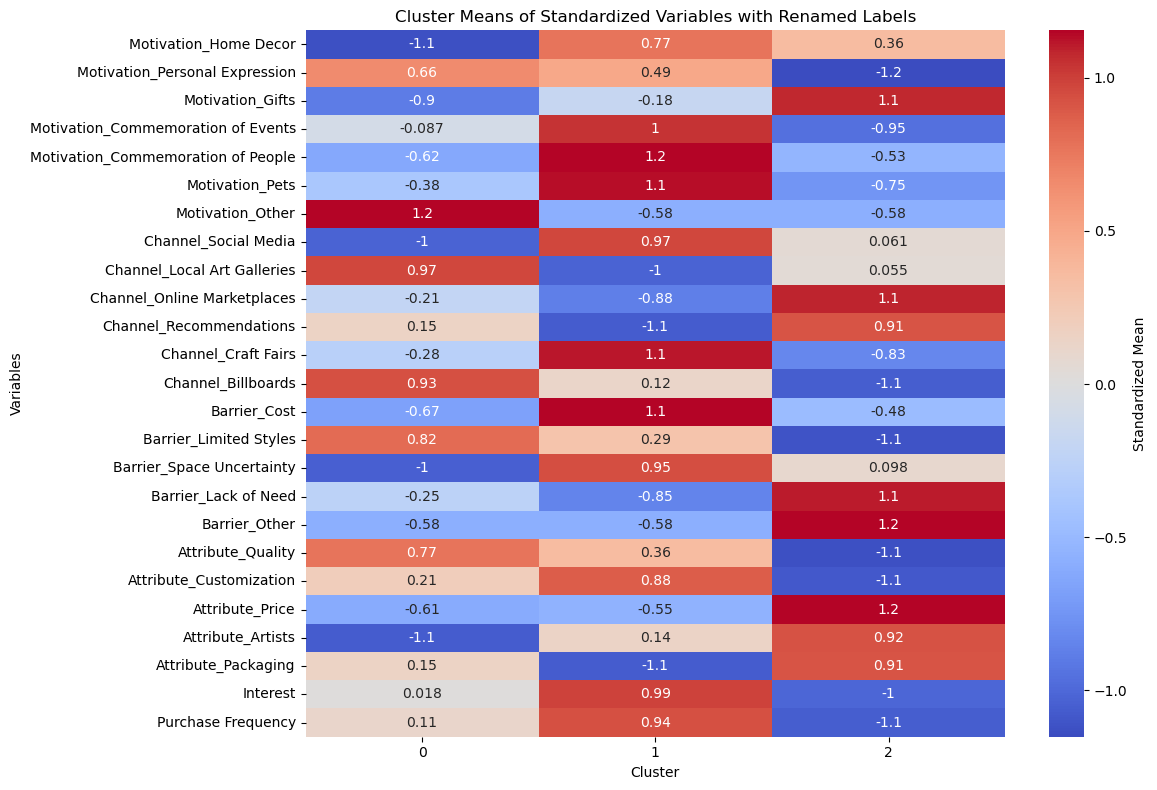

In [129]:
# Create a heatmap for the renamed standardized cluster means
plt.figure(figsize=(12, 8))
sns.heatmap(
    cluster_means_standardized_renamed.T,  # Transpose for variables on y-axis
    annot=True,  # Display values
    cmap="coolwarm",  # Color scheme
    cbar_kws={"label": "Standardized Mean"}  # Add color bar label
)
plt.title("Cluster Means of Standardized Variables with Renamed Labels")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.tight_layout()  # Adjust layout for clarity
plt.show()

In [145]:
# Assuming `survey_data` is the original survey dataset and `clustering_data` contains the `Cluster` column
# Merge the cluster column back into the original survey data
merged_data = survey.copy()
merged_data['Cluster'] = clustering_data['Cluster']
merged_data

,Q1_gender,Q2_age,Q3_interest,Q4_purchase_frequency,Q5_barrier,Q6_previous_purchase,Q7_channel,Q8_motivation,Q9_purchase_factor,Q10_attribute_most,...,Q10_attribute_most_2,Q10_attribute_most_3,Q10_attribute_most_4,Q10_attribute_most_5,Q10_attribute_least_1,Q10_attribute_least_2,Q10_attribute_least_3,Q10_attribute_least_4,Q10_attribute_least_5,Cluster
0,2,2,2,4,"2,3",2,3,"1,2","3,4,5",5,...,0,0,0,1,0,0,0,0,0,0
1,2,2,4,3,"1,2","3,4",3,"1,5","2,3,4",1,...,0,0,0,0,0,0,0,0,0,1
2,1,2,4,3,1,"1,4",2,"1,2,5","2,3,4",2,...,1,0,0,0,0,0,0,0,0,1
3,1,2,2,2,2,2,3,"2,3",2,1,...,0,0,0,0,0,0,1,0,0,0
4,1,3,3,2,"1,2,3,4","1,2,3,4",6,"1,2,3","1,2,3",1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,2,1,2,4,2,1,"1,3","1,2,6",1,...,0,0,0,0,0,1,0,0,0,2
60,1,3,4,2,2,"2,3",3,"1,2","1,2,3",1,...,0,0,0,0,0,0,0,0,0,0
61,2,4,5,3,"3,4",2,2,"1,2,3,4,5","2,3,4",1,...,0,0,0,0,0,0,0,0,0,1
62,2,2,4,2,"2,4",3,5,2,"1,2,3",1,...,0,0,0,0,0,0,0,0,0,0


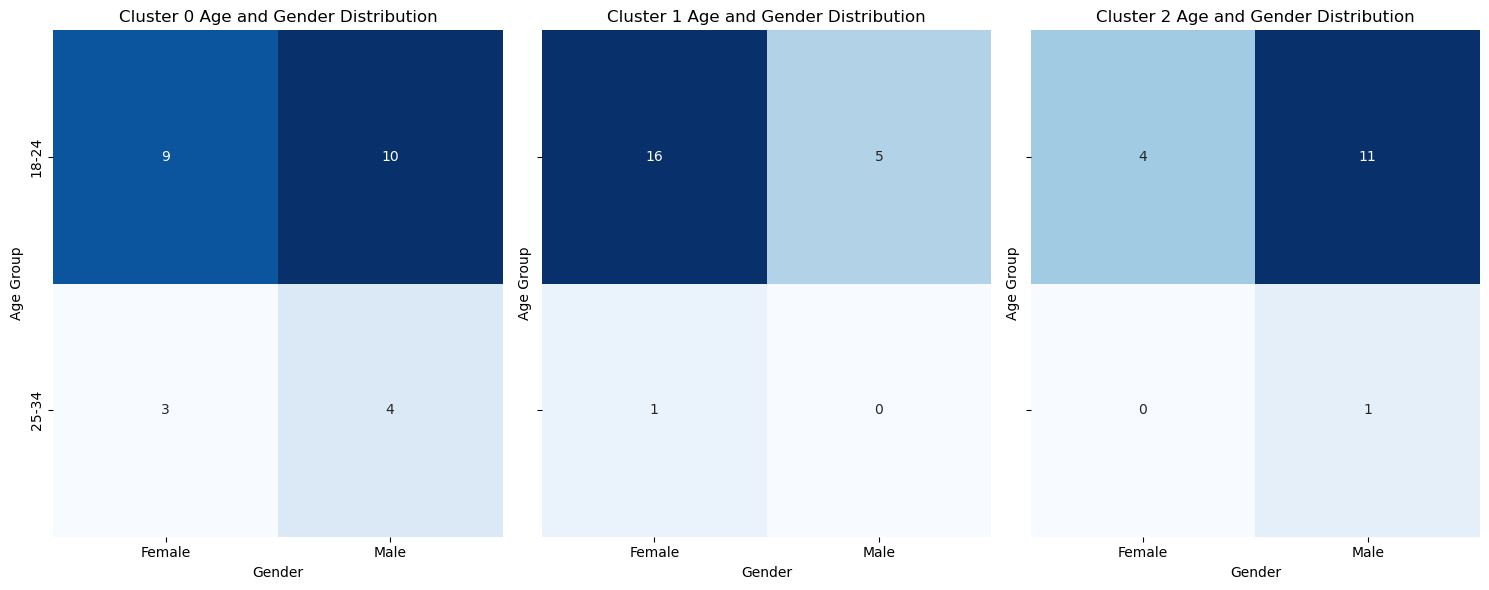

In [165]:
# Recode gender and age group in the merged_data DataFrame
merged_data['Q1_gender'] = merged_data['Q1_gender'].replace({1: 'Male', 2: 'Female'})
merged_data['Q2_age'] = merged_data['Q2_age'].replace({2: '18-24', 3: '25-34', 4: '35-44'})

# Recreate the heatmaps with the recoded data
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

for cluster, ax in zip(sorted(merged_data['Cluster'].unique()), axes):
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    cluster_age_gender = pd.crosstab(cluster_data['Q2_age'], cluster_data['Q1_gender'])
    
    sns.heatmap(
        cluster_age_gender,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=ax,
        cbar=False
    )
    ax.set_title(f"Cluster {cluster} Age and Gender Distribution")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Age Group")

plt.tight_layout()
plt.show()

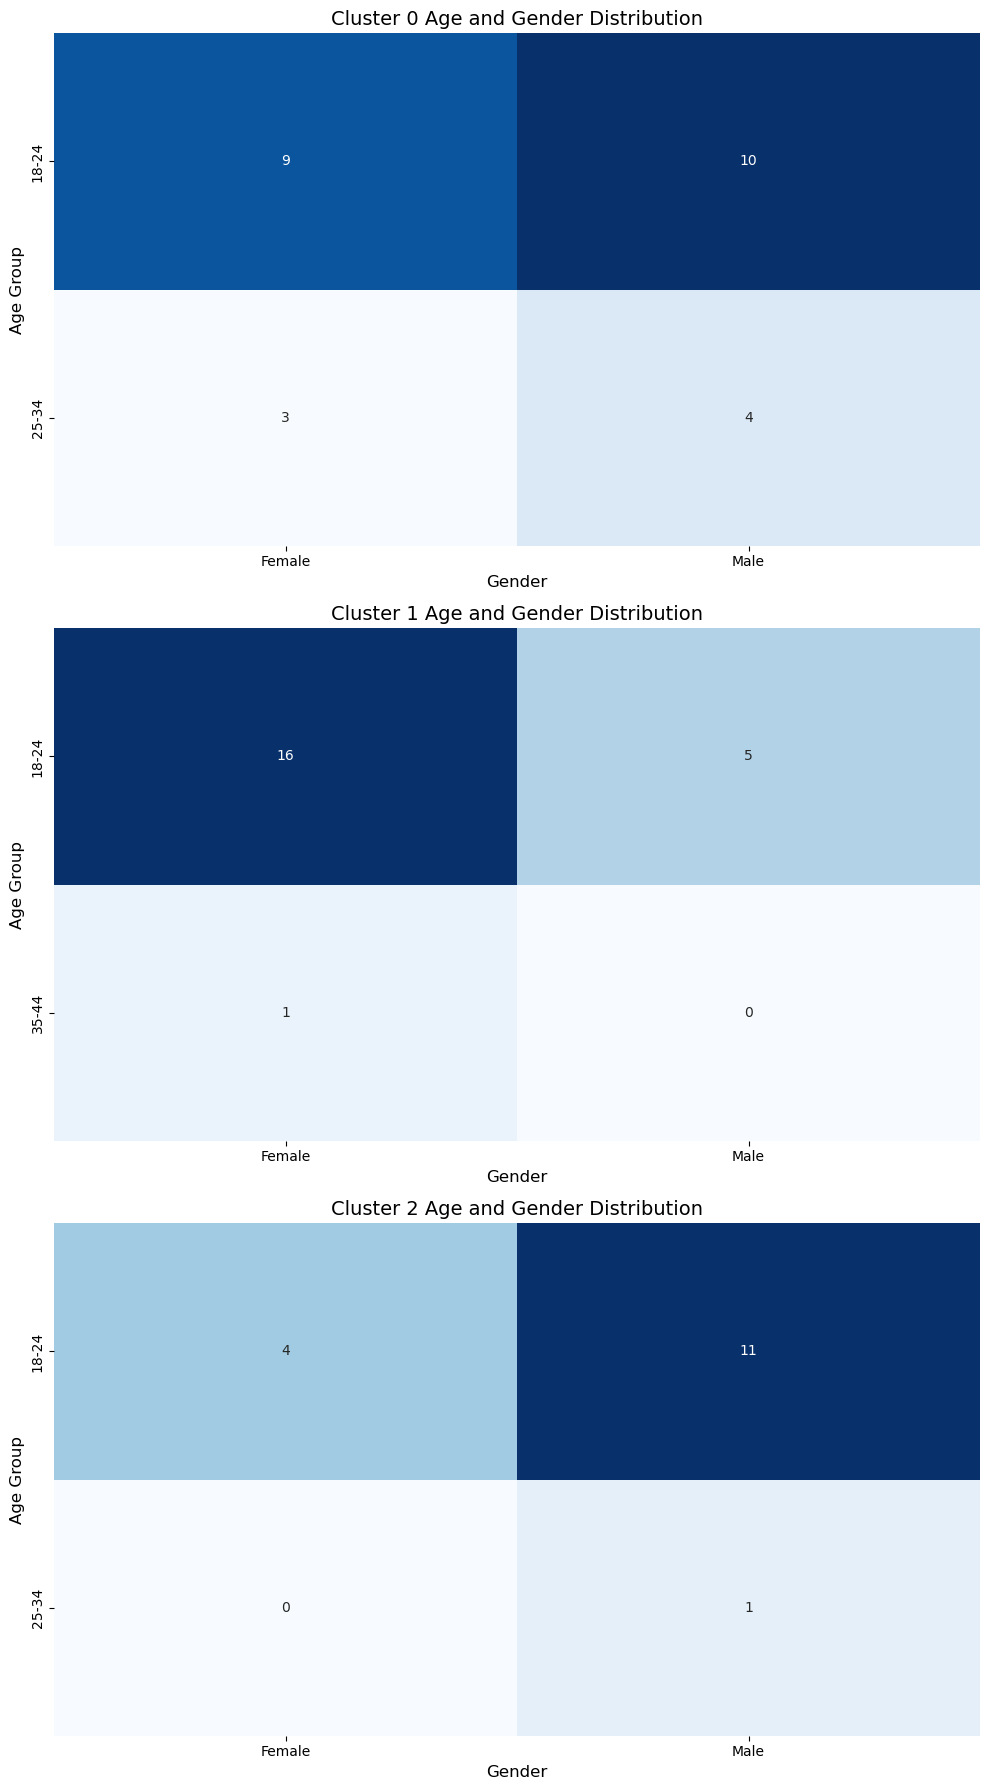

In [171]:
# Create heatmaps for each cluster with consistent 'Female' and 'Male' labels in every plot
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

for i, cluster in enumerate(sorted(merged_data['Cluster'].unique())):
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    cluster_distribution = pd.crosstab(cluster_data['Q2_age'], cluster_data['Q1_gender'])
    
    sns.heatmap(
        cluster_distribution,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=axes[i],
        cbar=False
    )
    axes[i].set_title(f"Cluster {cluster} Age and Gender Distribution", fontsize=14)
    axes[i].set_xlabel("Gender", fontsize=12)
    axes[i].set_ylabel("Age Group", fontsize=12)
    axes[i].set_xticklabels(['Female', 'Male'])  # Ensure 'Female' and 'Male' labels are in every plot

plt.tight_layout()
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(clustering_data.iloc[:, :-1], clustering_data['Cluster'])
feature_importances = rf.feature_importances_

In [220]:
# Define the dependent variable
y = survey['Q4_purchase_frequency']

# Define the independent variables
dummy_cols = [col for col in survey.columns if col.startswith(('Q5_barrier_',
                                                               'Q7_channel_', 
                                                               'Q8_motivation_', 
                                                               'Q9_purchase_factor_',
                                                               'Q10_attribute_least_',
                                                               'Q10_attribute_most'
                                                              ))]
additional_cols = ['Q11_artistic_background', 'Q12_AR']  # Additional variables
X = survey[dummy_cols + additional_cols]  # Combine existing dummies with additional variables
X = sm.add_constant(X)  # Add constant for regression

# Fit the regression model
regression_model = OLS(y, X).fit()

# Display regression results
print(regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     Q4_purchase_frequency   R-squared:                       0.524
Model:                               OLS   Adj. R-squared:                 -0.033
Method:                    Least Squares   F-statistic:                    0.9404
Date:                   Sun, 17 Nov 2024   Prob (F-statistic):              0.571
Time:                           00:54:59   Log-Likelihood:                -55.211
No. Observations:                     64   AIC:                             180.4
Df Residuals:                         29   BIC:                             256.0
Df Model:                             34                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [222]:
# Group dummies by prefix and exclude one from each group
reference_dummies = []
for prefix in ['Q5_barrier_', 'Q7_channel_', 'Q8_motivation_', 'Q9_purchase_factor_', 'Q10_attribute_least_','Q10_attribute_most_']:
    # Identify all columns starting with the prefix
    group_cols = [col for col in dummy_cols if col.startswith(prefix)]
    if group_cols:
        reference_dummies.append(group_cols[0])  # Drop the first dummy in each group

# Exclude the reference dummies from the list of independent variables
independent_dummies = [col for col in dummy_cols if col not in reference_dummies]

In [224]:
# Define dependent variable
y = survey['Q4_purchase_frequency']

# Combine the refined dummy columns with additional numeric predictors
additional_cols = ['Q11_artistic_background', 'Q12_AR']
X = survey[independent_dummies + additional_cols]
X = sm.add_constant(X)  # Add constant for regression

# Fit the regression model
regression_model = OLS(y, X).fit()

# Display regression results
print(regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     Q4_purchase_frequency   R-squared:                       0.445
Model:                               OLS   Adj. R-squared:                 -0.060
Method:                    Least Squares   F-statistic:                    0.8804
Date:                   Sun, 17 Nov 2024   Prob (F-statistic):              0.636
Time:                           00:55:04   Log-Likelihood:                -60.176
No. Observations:                     64   AIC:                             182.4
Df Residuals:                         33   BIC:                             249.3
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

- Q9_purchase_factor_3 (Unique Styles vs. Prices): p-value: 0.074: Customers who value "unique styles" in the purchasing decision are predicted to have a 0.65 higher purchase frequency compared to those who prioritize "price" (the baseline). This suggests that emphasizing unique styles in product offerings may drive higher purchase activity, especially for customers who value differentiation in design.

-  Q10_attribute_most_4 (Artist's Background as Most Important) p-value: 0.057: When customers prioritize "artistic background" as the most important feature, their predicted purchase frequency is 0.91 lower compared to those who prioritize "quality" (the baseline). This indicates that while knowing the artistic background is appreciated, it may not translate to frequent purchases, likely because customization adds complexity or cost to the buying process.
  
-  Q10_attribute_most_5 (Packaging) p-value: 0.134: Customers who consider "packaging" as the most important attribute are predicted to have a 0.73 higher purchase frequency compared to those who prioritize "quality." While this result is not statistically significant, it hints that attractive or functional packaging might appeal to certain customer segments.

- Q7_channel_4 (Specific sales channel) p-value: 0.114: Customers who prefer this specific sales channel (e.g., social media, retail stores, etc., depending on the data) have a predicted 0.96 higher purchase frequency compared to the baseline channel. This suggests that specific channels might drive more purchases, although the result isn’t highly conclusive.

In [266]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Test the impact of Q5_barrier dummies
barrier_model = ols('Q4_purchase_frequency ~ Q5_barrier_1 + Q5_barrier_2 + Q5_barrier_3 + Q5_barrier_4 + Q5_barrier_5', data=survey).fit()
barrier_anova = anova_lm(barrier_model, typ=2)
print("ANOVA for Q5_barrier:")
print(barrier_anova)

# Re-run ANOVA including all factors explicitly
purchase_factor_model = ols('Q4_purchase_frequency ~ Q9_purchase_factor_1 + Q9_purchase_factor_2 + Q9_purchase_factor_3 + Q9_purchase_factor_4 + Q9_purchase_factor_5 + Q9_purchase_factor_6', data=survey).fit()
purchase_factor_anova = anova_lm(purchase_factor_model, typ=2)
print("ANOVA for Q9_purchase_factor (all levels):")
print(purchase_factor_anova)

ANOVA for Q5_barrier:
                 sum_sq    df         F    PR(>F)
Q5_barrier_1   1.655791   1.0  2.565190  0.114673
Q5_barrier_2   1.566061   1.0  2.426179  0.124764
Q5_barrier_3   0.606499   1.0  0.939602  0.336405
Q5_barrier_4   0.514730   1.0  0.797432  0.375553
Q5_barrier_5   0.470401   1.0  0.728756  0.396799
Residual      37.438112  58.0       NaN       NaN
ANOVA for Q9_purchase_factor (all levels):
                         sum_sq    df         F    PR(>F)
Q9_purchase_factor_1   0.264977   1.0  0.405926  0.526596
Q9_purchase_factor_2   0.467034   1.0  0.715463  0.401173
Q9_purchase_factor_3   5.063648   1.0  7.757150  0.007250
Q9_purchase_factor_4   0.038225   1.0  0.058558  0.809658
Q9_purchase_factor_5   1.963809   1.0  3.008417  0.088238
Q9_purchase_factor_6   0.640861   1.0  0.981754  0.325954
Residual              37.207984  57.0       NaN       NaN


Key Insights:
- Q9_purchase_factor_3 (unique styles) is a significant predictor of purchase frequency (p = 0.007250, F = 7.757150). Customers who value unique styles are more likely to purchase frequently, indicating this factor should be emphasized in product offerings and marketing strategies.
- Q9_purchase_factor_5 (customization): Marginally significant (p = 0.088238, F = 3.008417). Suggests that customization may positively impact purchase frequency. Further validation with a larger dataset could confirm its importance for targeting specific customer segments.

In [256]:
# Test for Q7_channel dummies
channel_model = ols('Q4_purchase_frequency ~ Q7_channel_1 + Q7_channel_2 + Q7_channel_3 + Q7_channel_4 + Q7_channel_5 + Q7_channel_6', data=survey).fit()
channel_anova = anova_lm(channel_model, typ=2)
print("ANOVA for Q7_channel:")
print(channel_anova)

# Test for Q8_motivation dummies
motivation_model = ols('Q4_purchase_frequency ~ Q8_motivation_1 + Q8_motivation_2 + Q8_motivation_3 + Q8_motivation_4 + Q8_motivation_5 + Q8_motivation_6 + Q8_motivation_7', data=survey).fit()
motivation_anova = anova_lm(motivation_model, typ=2)
print("ANOVA for Q8_motivation:")
print(motivation_anova)

ANOVA for Q7_channel:
                 sum_sq    df         F    PR(>F)
Q7_channel_1   0.642815   1.0  0.870982  0.354553
Q7_channel_2   0.022235   1.0  0.030128  0.862805
Q7_channel_3   0.977618   1.0  1.324623  0.254487
Q7_channel_4   0.616126   1.0  0.834820  0.364665
Q7_channel_5   1.807527   1.0  2.449108  0.123032
Q7_channel_6   0.726958   1.0  0.984992  0.325092
Residual      42.806019  58.0       NaN       NaN
ANOVA for Q8_motivation:
                    sum_sq    df         F    PR(>F)
Q8_motivation_1   0.826381   1.0  1.196300  0.278745
Q8_motivation_2   1.090507   1.0  1.578660  0.214170
Q8_motivation_3   0.173305   1.0  0.250883  0.618417
Q8_motivation_4   0.490472   1.0  0.710026  0.403020
Q8_motivation_5   0.806911   1.0  1.168115  0.284422
Q8_motivation_6   0.069896   1.0  0.101184  0.751597
Q8_motivation_7   0.084847   1.0  0.122827  0.727303
Residual         38.683716  56.0       NaN       NaN


In [245]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Test the impact of Q10_attribute_most dummies
attribute_most_model = ols('Q4_purchase_frequency ~ Q10_attribute_most_1 + Q10_attribute_most_2 + Q10_attribute_most_3 + Q10_attribute_most_4 + Q10_attribute_most_5', data=survey).fit()
attribute_most_anova = anova_lm(attribute_most_model, typ=2)
print("ANOVA for Q10_attribute_most:")
print(attribute_most_anova)

# Test the impact of Q10_attribute_least dummies
attribute_least_model = ols('Q4_purchase_frequency ~ Q10_attribute_least_1 + Q10_attribute_least_2 + Q10_attribute_least_3 + Q10_attribute_least_4 + Q10_attribute_least_5', data=survey).fit()
attribute_least_anova = anova_lm(attribute_least_model, typ=2)
print("ANOVA for Q10_attribute_least:")
print(attribute_least_anova)

ANOVA for Q10_attribute_most:
                         sum_sq    df          F    PR(>F)
Q10_attribute_most_1   8.139888   1.0  12.142156  0.000936
Q10_attribute_most_2   2.202857   1.0   3.285971  0.074963
Q10_attribute_most_3   0.177488   1.0   0.264757  0.608793
Q10_attribute_most_4   0.019985   1.0   0.029811  0.863510
Q10_attribute_most_5   1.973405   1.0   2.943700  0.091460
Residual              39.552564  59.0        NaN       NaN
ANOVA for Q10_attribute_least:
                          sum_sq    df         F    PR(>F)
Q10_attribute_least_1   1.455645   1.0  2.032282  0.159349
Q10_attribute_least_2   0.039292   1.0  0.054857  0.815643
Q10_attribute_least_3   0.139469   1.0  0.194718  0.660660
Q10_attribute_least_4   0.030258   1.0  0.042244  0.837876
Q10_attribute_least_5   1.370889   1.0  1.913951  0.171827
Residual               41.543164  58.0       NaN       NaN


Key Insights:
- Q10_attribute_most_1 (quality of artwork): Highly significant (p = 0.000936, F = 12.142156). There is strong evidence that customers who prioritize quality purchase more frequently. 
- Q10_attribute_most_2 (customization options): Marginally significant (p = 0.074963). Suggests that customization options may influence purchase frequency, although the evidence is weaker. Further analysis with a larger sample size might confirm its importance.
- Q10_attribute_most_5: (packaging) Marginally significant (p = 0.091460). Indicates potential relevance of packaging to purchase behavior, warranting deeper exploration to understand its impact.